## Task 1: Load the Data

In [1]:
import pandas as pd

# Load dataset
file_path = "C:/Users/hp/Desktop/eda/Online Retail.xlsx"  # Update the path if needed
data = pd.read_excel(file_path)

# Display the first few rows
print(data.head())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [2]:
##Task 2: Data Cleaning

In [3]:
# Check for missing values
print(data.isnull().sum())

# Drop rows with missing CustomerID (critical for analysis)
data = data.dropna(subset=['CustomerID'])

# Handle missing or inconsistent Description
data['Description'] = data['Description'].str.strip()

# Drop duplicates if any
data = data.drop_duplicates()

# Display summary after cleaning
print(data.info())


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB
None


In [ ]:
Task 3: Basic Statistics

In [4]:
# Summary statistics
print(data.describe())

# Unique values in key columns
print(data['Country'].nunique(), "unique countries")
print(data['StockCode'].nunique(), "unique products")


            Quantity      UnitPrice     CustomerID
count  401604.000000  401604.000000  401604.000000
mean       12.183273       3.474064   15281.160818
std       250.283037      69.764035    1714.006089
min    -80995.000000       0.000000   12346.000000
25%         2.000000       1.250000   13939.000000
50%         5.000000       1.950000   15145.000000
75%        12.000000       3.750000   16784.000000
max     80995.000000   38970.000000   18287.000000
37 unique countries
3684 unique products


In [ ]:
Task 4: Data Visualization

C:\Users\hp\AppData\Local\Temp\ipykernel_10740\437910876.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_sales = data.groupby('Month').sum()['Quantity']


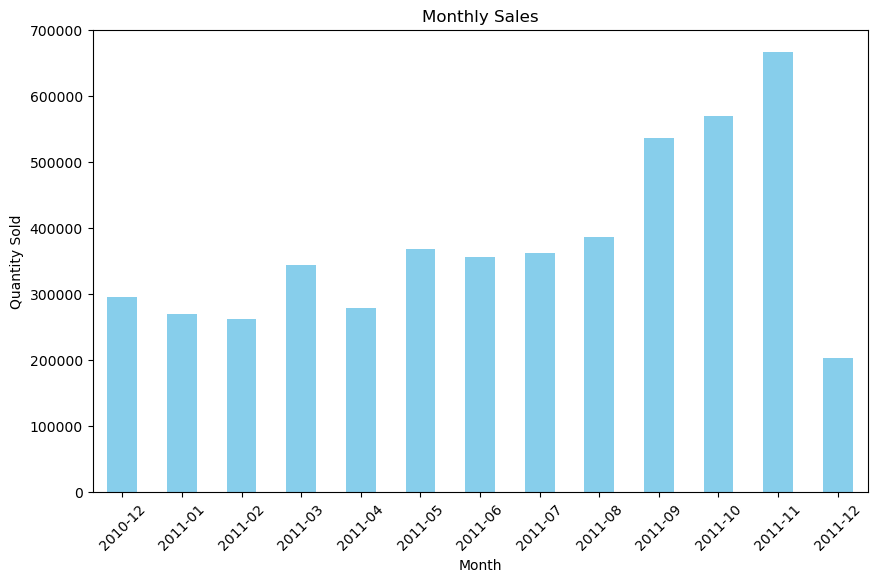

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert InvoiceDate to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Create a 'Month' column
data['Month'] = data['InvoiceDate'].dt.to_period('M')

# Group by month and calculate total sales
monthly_sales = data.groupby('Month').sum()['Quantity']

# Plot monthly sales
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title("Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45)
plt.show()


In [6]:
#Top Selling Product

C:\Users\hp\AppData\Local\Temp\ipykernel_10740\1111527577.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_products = data.groupby('Description').sum()['Quantity'].sort_values(ascending=False).head(10)


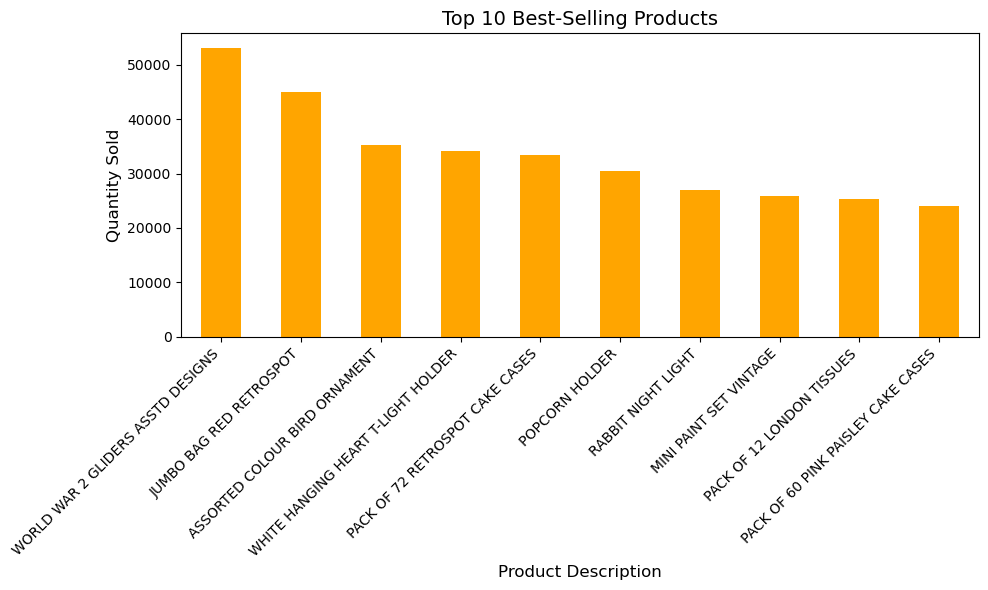

In [7]:
# Group by product and calculate total quantity sold
top_products = data.groupby('Description').sum()['Quantity'].sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
ax = top_products.plot(kind='bar', color='orange')

# Add titles and labels
plt.title("Top 10 Best-Selling Products", fontsize=14)
plt.xlabel("Product Description", fontsize=12)
plt.ylabel("Quantity Sold", fontsize=12)

# Align x-axis labels properly
plt.xticks(ticks=range(len(top_products)), labels=top_products.index, rotation=45, ha='right', fontsize=10)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [8]:
#Sales by Country

C:\Users\hp\AppData\Local\Temp\ipykernel_10740\4226911395.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  country_sales = data.groupby('Country').sum()['Quantity'].sort_values(ascending=False)


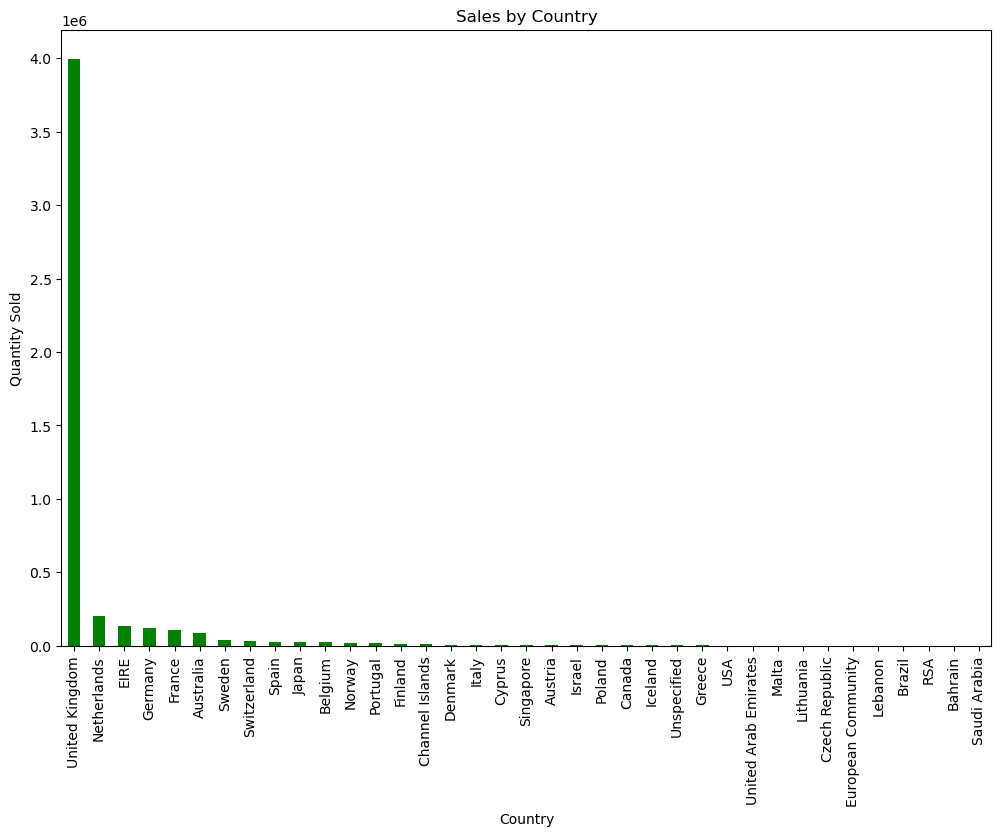

In [9]:
# Group by country and calculate total quantity sold
country_sales = data.groupby('Country').sum()['Quantity'].sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 8))
country_sales.plot(kind='bar', color='green')
plt.title("Sales by Country")
plt.xlabel("Country")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=90)
plt.show()


In [ ]:
Task 5: Anomalies and Outliers

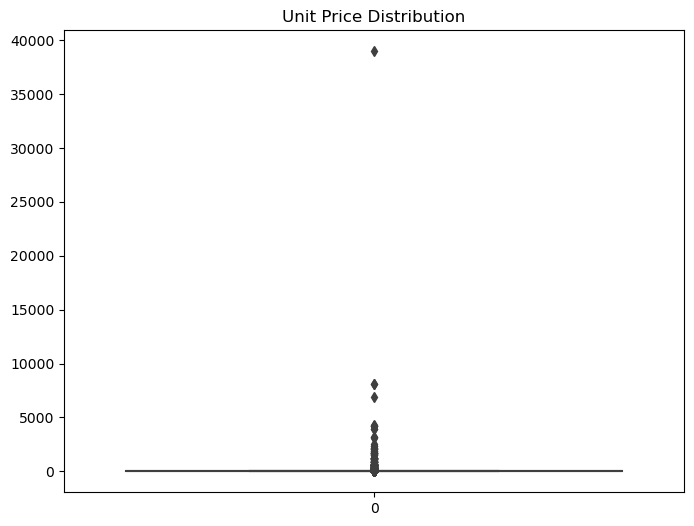

Potential Outliers:
       InvoiceNo      Description  UnitPrice  Quantity
45622    C540271           Manual    1126.00        -1
73446    C542348           Manual    1715.85        -1
88210    C543789           Manual     856.48        -1
117052   C546325           Manual    1687.17        -1
117053   C546327           Manual    1687.17        -1
...          ...              ...        ...       ...
494745   C578269  CRUK Commission     849.93        -1
508459    579196   DOTCOM POSTAGE    1526.76         1
508561   C579195  CRUK Commission     987.14        -1
528082    580727   DOTCOM POSTAGE    1599.26         1
528087   C580726  CRUK Commission    1100.44        -1

[86 rows x 4 columns]


In [10]:
# Plot UnitPrice distribution
plt.figure(figsize=(8, 6))
sns.boxplot(data['UnitPrice'])
plt.title("Unit Price Distribution")
plt.show()

# Identify potential anomalies
outliers = data[data['UnitPrice'] > 500]
print("Potential Outliers:")
print(outliers[['InvoiceNo', 'Description', 'UnitPrice', 'Quantity']])


In [ ]:
#Busiest Sales Months


C:\Users\hp\AppData\Local\Temp\ipykernel_10740\1445197744.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_sales = data.groupby('Month').sum()['Quantity']


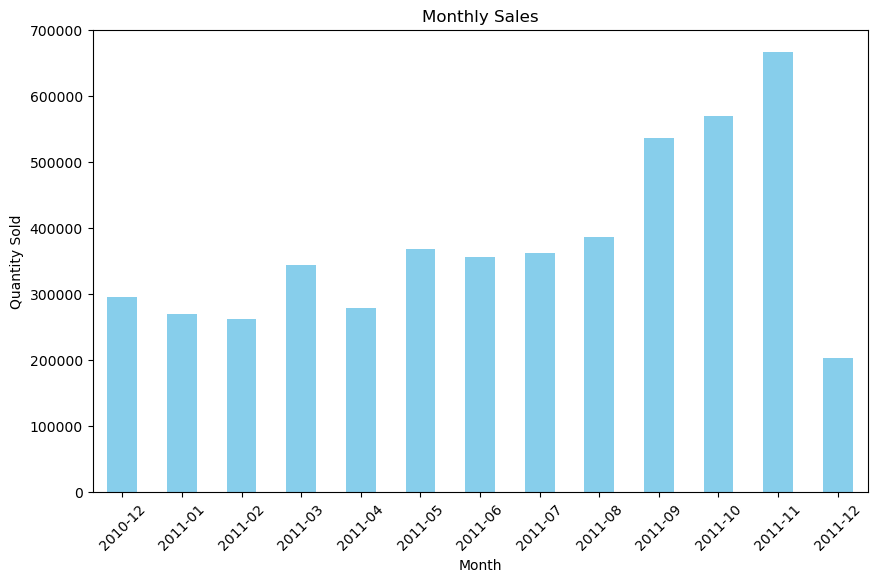

Busiest Months (Highest Sales):
Month
2011-11    666813
2011-10    568898
2011-09    536350
Freq: M, Name: Quantity, dtype: int64


In [11]:
# Group data by month
monthly_sales = data.groupby('Month').sum()['Quantity']

# Plot busiest sales months
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title("Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45)
plt.show()

# Insights from the plot
busiest_months = monthly_sales.sort_values(ascending=False).head(3)
print("Busiest Months (Highest Sales):")
print(busiest_months)


In [12]:
#Best-Selling Products

C:\Users\hp\AppData\Local\Temp\ipykernel_10740\2811116206.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_products = data.groupby('Description').sum()['Quantity'].sort_values(ascending=False).head(10)


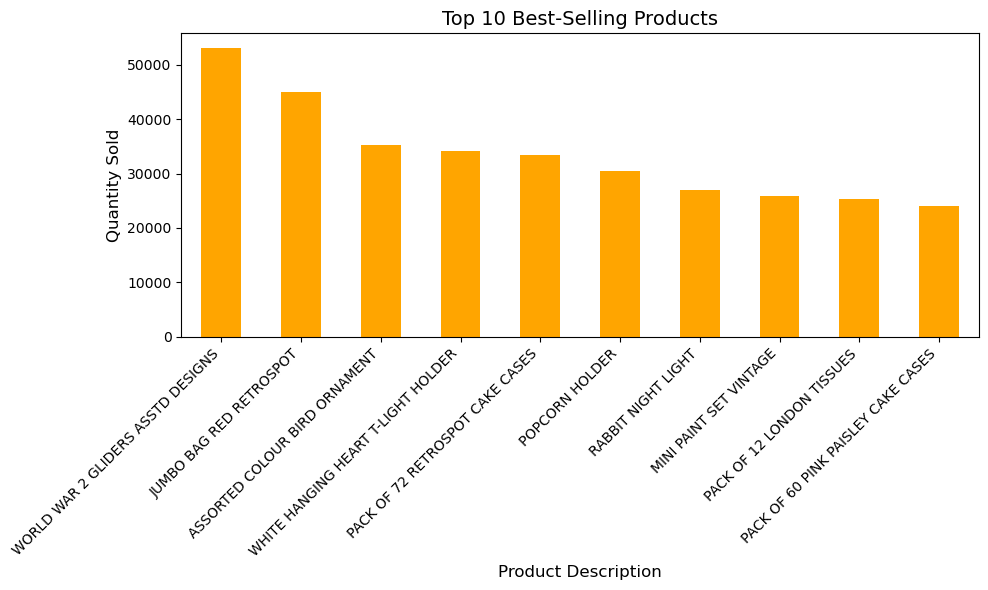

Top 10 Best-Selling Products:
Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53119
JUMBO BAG RED RETROSPOT               44963
ASSORTED COLOUR BIRD ORNAMENT         35215
WHITE HANGING HEART T-LIGHT HOLDER    34128
PACK OF 72 RETROSPOT CAKE CASES       33386
POPCORN HOLDER                        30492
RABBIT NIGHT LIGHT                    27045
MINI PAINT SET VINTAGE                25880
PACK OF 12 LONDON TISSUES             25305
PACK OF 60 PINK PAISLEY CAKE CASES    24129
Name: Quantity, dtype: int64


In [13]:
# Group data by product description
top_products = data.groupby('Description').sum()['Quantity'].sort_values(ascending=False).head(10)

# Create the plot
plt.figure(figsize=(10, 6))
ax = top_products.plot(kind='bar', color='orange')

# Set title and labels
ax.set_title("Top 10 Best-Selling Products", fontsize=14)
ax.set_xlabel("Product Description", fontsize=12)
ax.set_ylabel("Quantity Sold", fontsize=12)

# Align x-axis labels correctly
ax.set_xticks(range(len(top_products)))  # Set x-ticks
ax.set_xticklabels(top_products.index, rotation=45, ha='right', fontsize=10)  # Set corresponding labels

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Insights from the plot
print("Top 10 Best-Selling Products:")
print(top_products)


In [14]:
#Customer Targeting
#Identify Repeat Buyers

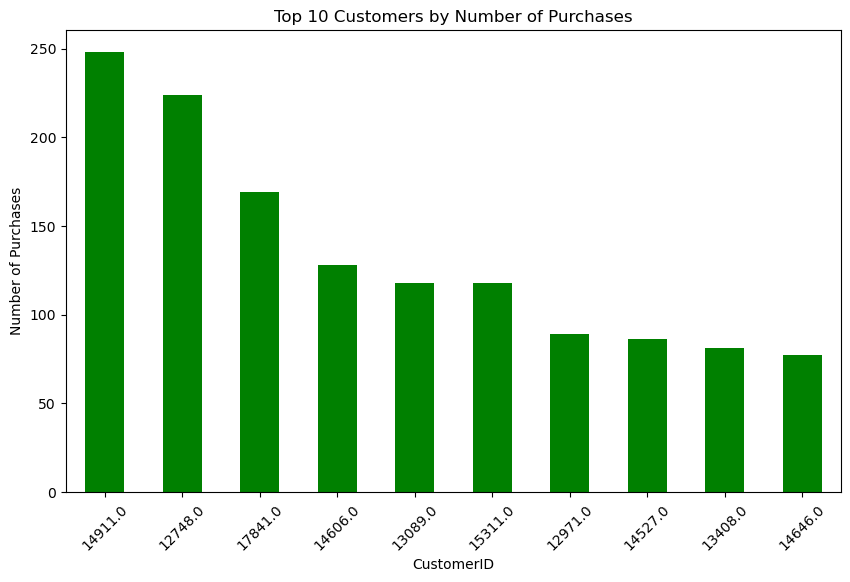

Top 10 Repeat Customers:
CustomerID
14911.0    248
12748.0    224
17841.0    169
14606.0    128
13089.0    118
15311.0    118
12971.0     89
14527.0     86
13408.0     81
14646.0     77
Name: InvoiceNo, dtype: int64


In [15]:
# Count transactions per customer
customer_transactions = data.groupby('CustomerID').nunique()['InvoiceNo']

# Identify repeat buyers
repeat_customers = customer_transactions[customer_transactions > 1].sort_values(ascending=False)

# Plot top 10 customers by the number of purchases
top_customers = repeat_customers.head(10)

plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar', color='green')
plt.title("Top 10 Customers by Number of Purchases")
plt.xlabel("CustomerID")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=45)
plt.show()

# Insights
print("Top 10 Repeat Customers:")
print(top_customers)
